In [1]:
from numpy import arange

import random

from functions_fuzzy import func_nao_linear

import math

import numpy as np

from matplotlib import pyplot as plt

from functions_fuzzy import Trapezoidal, trapezoidal

random.seed(42)

x_suave = np.linspace(0, 10, 200)

In [2]:
print(arange(0, 4, 0.3))

[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9]


### Gere um conjunto de dados com valores de x no intervalo de [0,10] e calcule os valores correspondentes de f(x) para esses pontos. Atenc ¸˜ao para gerar um n´ umero suficiente de pontos.

In [3]:
samples = [
    arange(0, 10, 0.4),
    arange(0, 10, 0.1),
    arange(0, 10, 0.2),
    arange(0, 10, 0.3),
    arange(0, 10, 0.4),
    arange(0, 10, 0.5),
    arange(0, 10, 0.6),
    arange(0, 10, 0.7),
    arange(0, 10, 0.8),
    arange(0 ,10, 0.9),
    arange(3, 9, 0.4),
    arange(2, 8, 0.4),
    arange(2, 9, 0.4),
    arange(2, 10, 0.4),
    arange(1, 7, 0.4),
    arange(1, 8, 0.4),
    arange(1, 9, 0.4),
    arange(2, 10, 0.3),
    arange(1, 7, 0.3),
    arange(1, 8, 0.3),
    arange(1, 9, 0.3)
] # Geração de 17 amostras com diferentes intervalos entre 0 e 10


# Gerando amostragem "Aleatória" sob a amostragem prévia
complete_sampling = [round(float(x[9]), 5) for x in samples]

complete_output = [round(func_nao_linear(x), 7) for x in complete_sampling]

print(complete_sampling)

print(complete_output)

print(len(samples))



[3.6, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 6.6, 5.6, 5.6, 5.6, 4.6, 4.6, 4.6, 4.7, 3.7, 3.7, 3.7]
[np.float64(0.265492), np.float64(1.2269337), np.float64(1.1846001), np.float64(0.7964382), np.float64(0.265492), np.float64(-0.0821954), np.float64(-0.0467867), np.float64(0.292061), np.float64(0.6337617), np.float64(0.6828436), np.float64(0.422906), np.float64(0.0106465), np.float64(0.0106465), np.float64(0.0106465), np.float64(-0.0983265), np.float64(-0.0983265), np.float64(-0.0983265), np.float64(-0.1093338), np.float64(0.2121958), np.float64(0.2121958), np.float64(0.2121958)]
21


In [4]:
# Gerando os centros

x = [0, 0.5, 0.6, 1] # Trapezoidal

#  f(x)<−0.5         Antes da onda	        Sem risco
# −0.5<f(x)<−0.25	Início da perturbação	Risco leve
# −0.25<f(x)<0.25	Turbulência máxima	    Risco extremo
# 0.25<f(x)<0.5      Ondas diminuindo    	Risco moderado
# f(x)>0.5           Mar se acalmando	    Risco leve ou sem risco


conjuntos ={
    "Sem risco" : [0, 2.2, 3.4, 3.6],
    "Risco leve" : [3.2, 4, 4.5, 5.2],
    "Risco extremo" : [4.8, 5.1, 5.6, 6],
    "Risco moderado" : [5.7, 7, 7.4, 8],
    "Risco leve ou sem risco" : [7.8, 8, 9.2, 10]
}


In [5]:
pertinencias = {}

print(type(complete_sampling))

# trapezoidal(complete_sampling, 1, 2, 3, 4)
for nome, (a,b,c,d) in conjuntos.items():
    pertinencias[nome] = trapezoidal(complete_sampling, a, b, c, d)

<class 'list'>


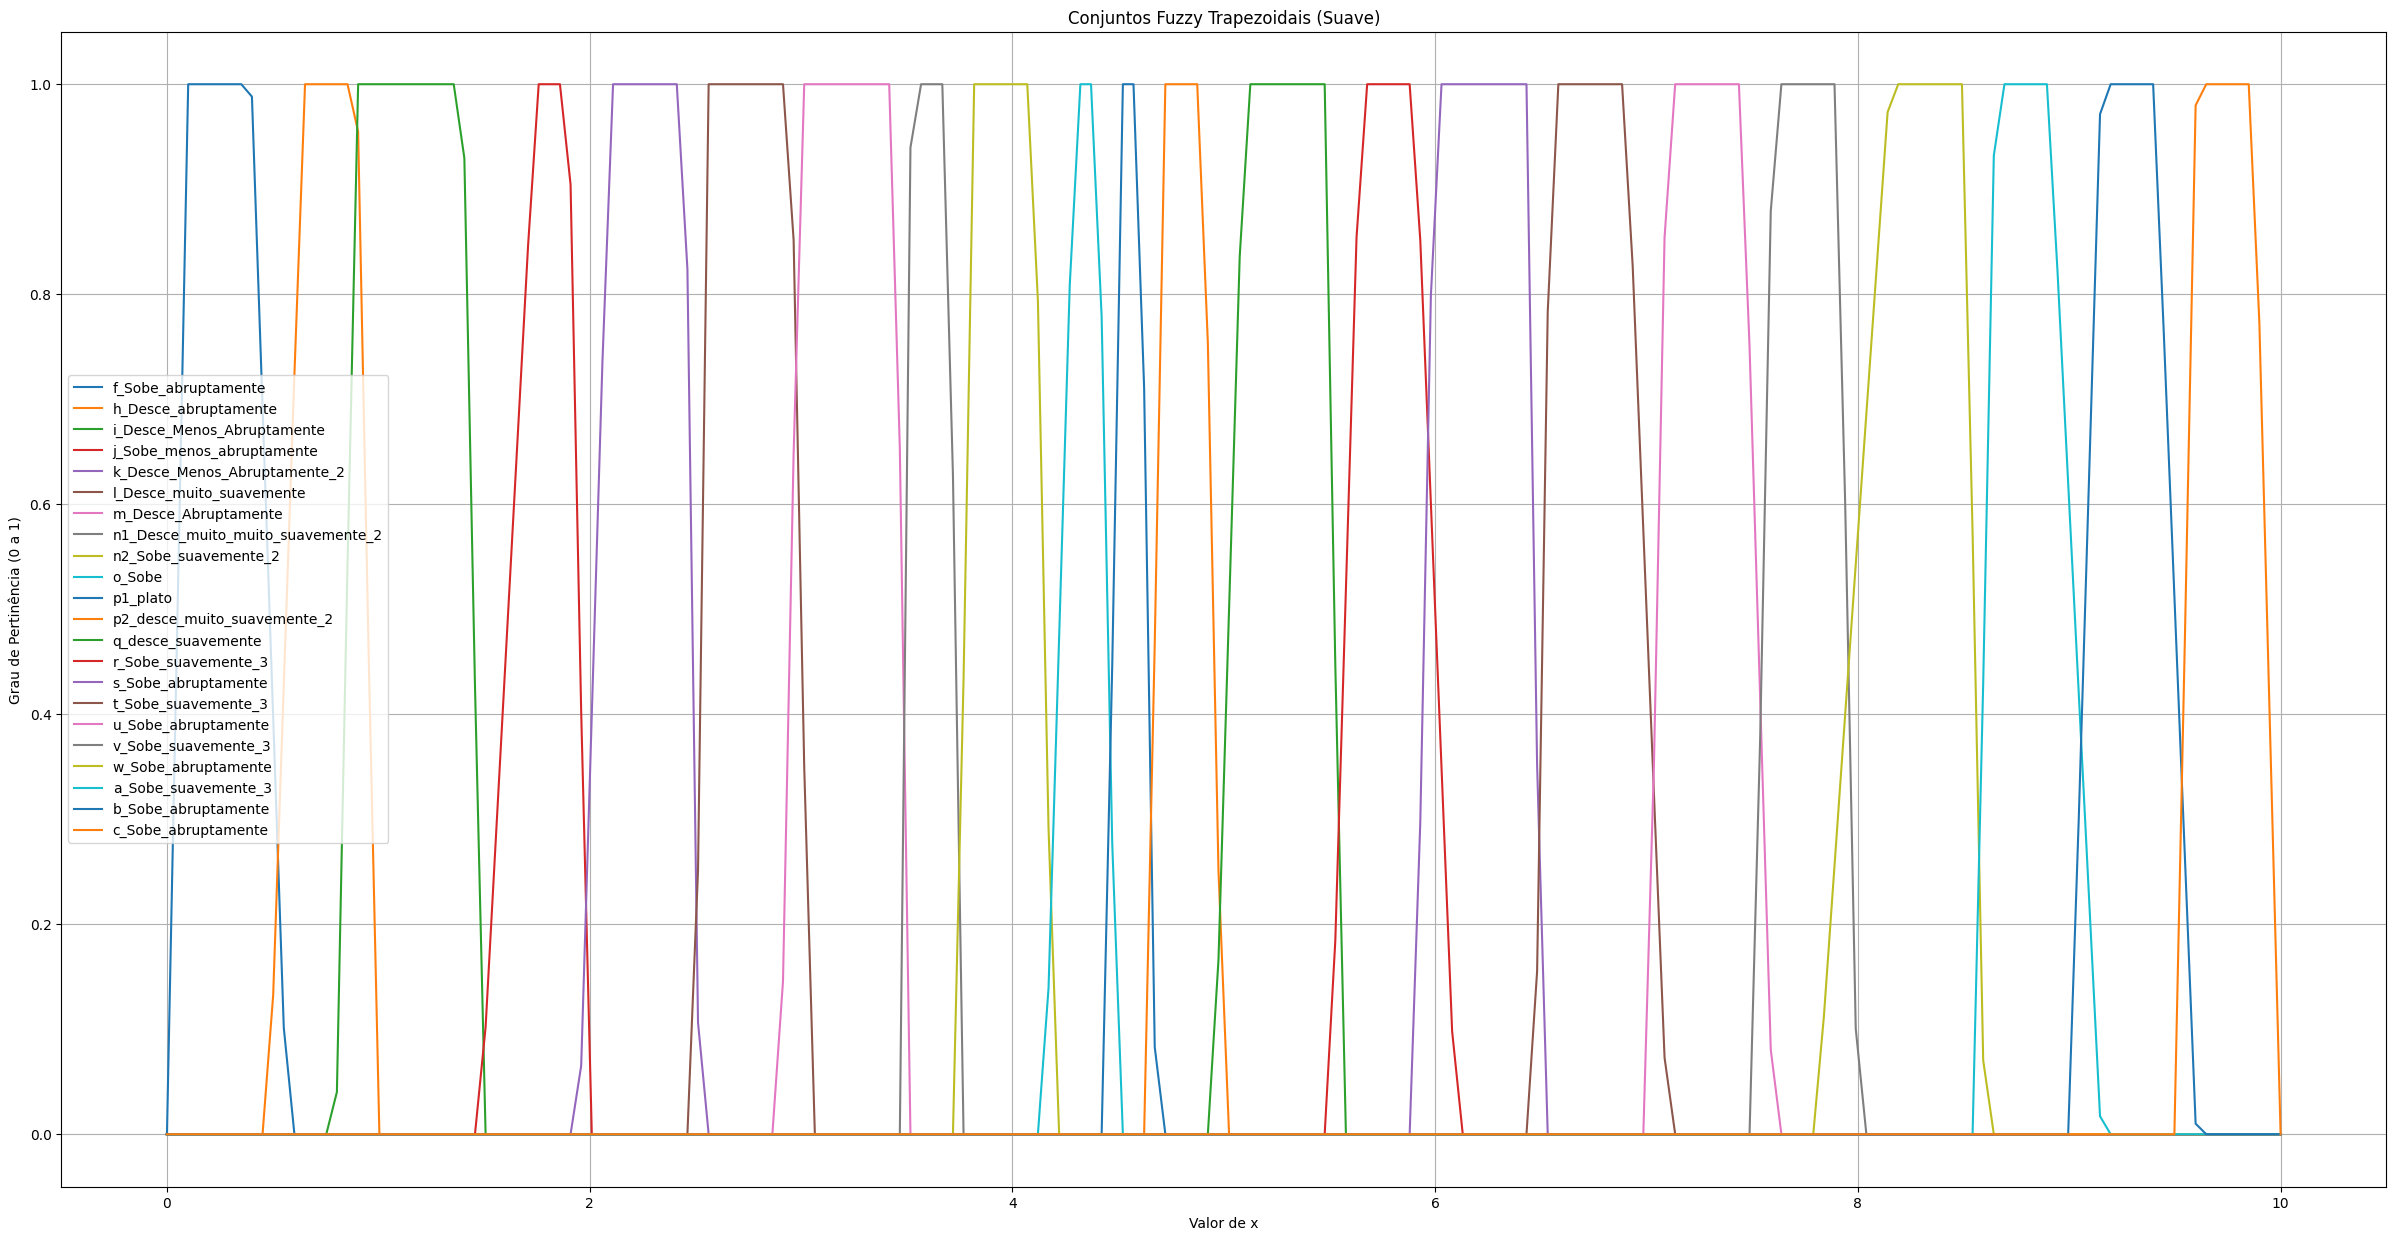

In [6]:


# Gera muitos pontos igualmente espaçados entre 0 e 10
x_suave = np.linspace(0, 10, 200)

conjuntos = {
    # Comportamentos Abruptos
    "f_Sobe_abruptamente": [0, 0.1, 0.4, 0.57], #f
    "h_Desce_abruptamente": [0.48, 0.65, 0.9, 1], #h
    # Comportamentos "Menos Abruptos" (transições moderadas)
    "i_Desce_Menos_Abruptamente": [0.8, 0.9, 1.4, 1.5], #i  # Cobre 1-1.5
    "j_Sobe_menos_abruptamente": [1.48, 1.75, 1.9, 2], #j   # Cobre 1.5-2
    "k_Desce_Menos_Abruptamente_2": [1.95, 2.10, 2.45, 2.52], #k  # Cobre 2.5-3
    "l_Desce_muito_suavemente": [2.5, 2.55, 2.95, 3.05], #l       # Cobre 2.5 - 3
    "m_Desce_Abruptamente" : [2.9, 3, 3.45, 3.5], #m  Cobre 3 - 3.5
    "n1_Desce_muito_muito_suavemente_2": [3.48, 3.52, 3.7, 3.75], #n1       # Cobre 3.5-3.74
    "n2_Sobe_suavemente_2": [3.745, 3.8, 4.1, 4.2], #n2      # Cobre 3.74-4 
    # Comportamentos Suaves
    "o_Sobe": [4.15, 4.3, 4.4, 4.5], #o       # Cobre 4-4.5 
    "p1_plato" : [4.45, 4.5, 4.6, 4.68], #p1 Cobre 4.5- 4.68
    "p2_desce_muito_suavemente_2" :  [4.65, 4.7, 4.9, 5], #p2 Cobre 4.65 - 5



    "q_desce_suavemente": [4.95, 5.1, 5.5, 5.55], # q
    "r_Sobe_suavemente_3" : [5.5, 5.65, 5.9, 6.1], # r
    "s_Sobe_abruptamente": [5.9, 6, 6.45, 6.5],       # s Cobre 6 - 6.5
    
    # Comportamentos Suaves Adicionais
    "t_Sobe_suavemente_3": [6.47, 6.55, 6.9, 7.1],              # t
    "u_Sobe_abruptamente": [7, 7.1, 7.45, 7.6],              # u
    "v_Sobe_suavemente_3": [7.5, 7.6, 7.9, 8],     # v
    "w_Sobe_abruptamente": [7.8, 8.15, 8.5, 8.6], # w
    "a_Sobe_suavemente_3": [8.55, 8.65, 8.9, 9.15],      # Cobre 8-8.5
    "b_Sobe_abruptamente": [9, 9.15, 9.4, 9.6],# Cobre 8.5-8.63 e 8.63-9
    "c_Sobe_abruptamente": [9.5, 9.6, 9.87, 10.0]             # Cobre 9-10
}

# Calcula pertinências para cada conjunto
pertinencias = {}
for nome, (a, b, c, d) in conjuntos.items():
    pertinencias[nome] = trapezoidal(x_suave, a, b, c, d)

# Plota os conjuntos fuzzy
plt.figure(figsize=(30, 15))
for nome, pert in pertinencias.items():
    plt.plot(x_suave, pert, label=nome)
plt.title("Conjuntos Fuzzy Trapezoidais (Suave)")
plt.xlabel("Valor de x")
plt.ylabel("Grau de Pertinência (0 a 1)")
plt.legend()
plt.grid()
plt.show()

### Criando os consequentes para cada conjunto Fuzzy. Em Takaki-Sugeno cada regra terá um consquente $y = p_i \cdot x + q_i$

In [7]:
from regras_consequentes01_TSK import *
modelo = np.zeros_like(x_suave)
peso_total = np.zeros_like(x_suave)

for consequente in consequentes:
    consequente_output = saida_do_consequente(consequentes[consequente]["p"], x_suave, consequentes[consequente]["q"])
    pertinencia = pertinencias[consequente]

    modelo += pertinencia * consequente_output
    peso_total += pertinencia

modelo = np.divide(modelo, peso_total, where = (peso_total != 0))


print(modelo[3])
imagem_func_nao_linear = func_nao_linear(x_suave)
print(imagem_func_nao_linear[3])

0.4522613065326634
1.0453909436451738


In [8]:
mse = np.mean((modelo-imagem_func_nao_linear)**2)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")


MSE: 0.2715, RMSE: 0.5210


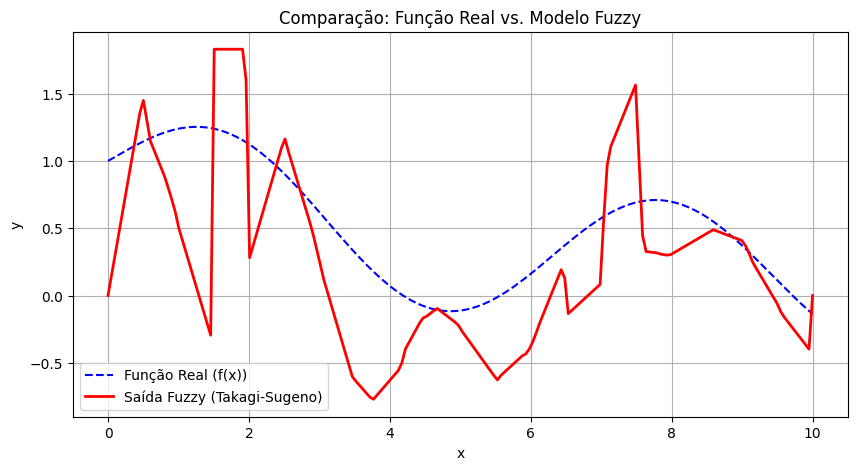

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_suave, imagem_func_nao_linear, label="Função Real (f(x))", color='blue', linestyle='--')
plt.plot(x_suave, modelo, label="Saída Fuzzy (Takagi-Sugeno)", color='red', linewidth=2)
plt.title("Comparação: Função Real vs. Modelo Fuzzy")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Aplicando RLS 

In [10]:
Phi = np.column_stack([pertinencias[nome] * x_suave for nome in consequentes] + 
                     [pertinencias[nome] for nome in consequentes])
theta, _, _, _ = np.linalg.lstsq(Phi, y_real, rcond=None)

NameError: name 'y_real' is not defined